In [2]:
%matplotlib inline
#%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib.patches import Arc
import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import plot, scatter, axis, show, axhline, axvline, annotate, grid, legend

# Get a legend label
def leg(label, color='black'):
    return mpatches.Patch(color=color, label=label)

# Linear Systems

## Introduction
Now that we have a handle on [vectors](vectors) and [matrices](matrices), we're going to take our first foray into using what we've learned so far and apply it to a real problem. This problem will help drive some of the examples so that we can draw connections between the problem and the concepts used to solve the problem. Recall from the [Introduction](introduction) guide we introduced _Harry's Hotdogs and Hamburgers_. Harry has enlisted our help to solve a problem of his:

> Harry recently set up shop at a baseball game. Things went well, but at the end of the day, Harry realized that he didn't keep track of how many individual hotdogs and hamburgers he sold, but he does have totals. He knows that he sold of a combined total of 50 hotdogs and hamburgers, and he made \\$85.00 total. Harry sells the hotdogs for \\$1.50 and the hamburgers for \\$2.00. In order to restock, Harry would like to know how many hotdogs and hamburgers he individually sold.

Okay, now that we understand the problem, let's see if we can write what we know in math terms. We know the total number of hotdogs and hamburgers sold was 50:

$$hotdogs + hamburgers = 50$$

And, selling the hotdogs for \\$1.50 and the hamburgers for \\$2.00 the total amount made was \\$85.00:

$$\$1.50 * hotdogs + \$2.00 * hamburgers = \$85.00$$

To make things easier to look at, we'll abbreviate the number of hotdogs as $d$ and hamburgers as $h$. We can specify our full problem as:

$$
d + h = 50 \\[3pt]
1.5d + 2h = 85
$$

This is Harry's problem formalized into math terms. Since he wants to know the individual number of hotdogs and hamburgers sold, **our goal is to find the values of $d$ and $h$**.

## Linear equations

Each of the equations above specify a linear equation. The most common linear equation that we've all seen is:

$$y = mx + b$$

This is the equation of a line written in slope-intercept form, where $m$ is the slope and $b$ is the y-intercept. In general, linear equations are equations that can be written in the form:

$$a_1x_1 + a_2x_2 + \dots + a_nx_n + b = 0$$

Where $a_1, a_2, \dots a_n, b$ are called **coefficients** and $x_1, x_2, \dots x_n$ are called **variables**. This form may look quite different than the slope-intercept form that we just saw, but we can easily rearrange the slope-intercept form into this more general form:

$$y = mx + b \quad\rightarrow\quad mx - y + b = 0$$

$x$ and $y$ are the variables, and the coefficients are $m$, $-1$ (the implicit $-1$ in front of $y$), and $b$. Note, we're free to use whatever names we like for the variables as long as we're consistent in the usage across equation. For basic 2D lines, the conventional variables are $x$ and $y$.

Okay, back to the problem at hand. Given Harry's first equation from above, we can rearrange $d + h = 50$ into an equation that more resembles the slope-intercept form:

$$d + h = 50 \quad\rightarrow\quad h = -d + 50$$

The only difference here is that we're using $d$ and $h$ instead of $x$ and $y$, but they're just variable names, so we're free to use what we want; however, it is important that we're consistent with the usage across equations. $h = -d + 50$ is equivalent to $y = -x + 50$ with $m = -1$, $b = 50$.

It's often useful to visualize the line in order to understand the relationship among the variables. Given that we know $m$ and $b$, this equation can easily be visualized by plugging in values for $d$ and calculating the value for $h$:

$$
\begin{array}{| c | l | c |}
\hline
d & & h \\
\hline
0 & h = -(0) + 50 & 50 \\ \hline 
10 & h = -(10) + 50 & 40 \\ \hline
20 & h = -(20) + 50 & 30 \\ \hline
\end{array}
$$

We can clearly see that by increasing $d$, the values of $h$ go down and vice versa. This means that the line is sloping downwards.

Now that we have some points, let's plot them and draw a line through them. We can plot these points by plotting the values of $d$ along the X-axis and $h$ along the Y-axis:

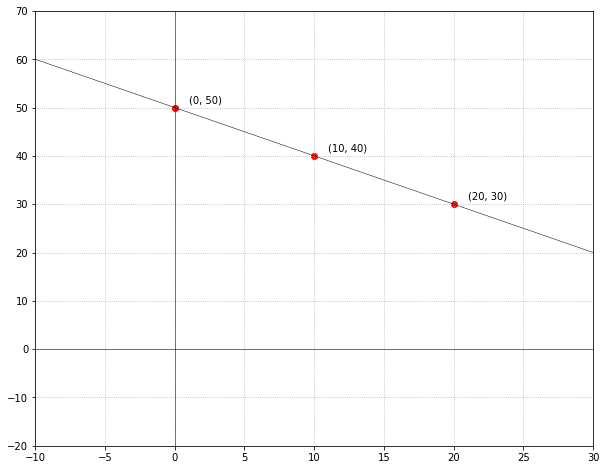

In [32]:
plt.figure(figsize=(10, 8))
axis(xmin=-10, xmax=30, ymin=-20, ymax=70)
axhline(y=0, color='k', linewidth=0.5)
axvline(x=0, color='k', linewidth=0.5)
plt.grid(linestyle='dotted')

scatter([0, 10, 20], [50, 40, 30], color='red')
plot([-10, 30], [60, 20], 'k-', lw=0.5)

annotate('(0, 50)', xy=(0, 50), xytext=(1, 51), ha='left')
annotate('(10, 40)', xy=(10, 40), xytext=(11, 41), ha='left')
annotate('(20, 30)', xy=(21, 31), ha='left')

show()

Since we are plotting the equation $d + h = 50$ (or, equivalently $h = -d + 50$), this chart represents the total number of hotdogs and hamburgers sold, with the X and Y-axes being the number of hotdogs and hamburgers respectively. Starting when $d = x = 0$, we can see the value of $h = y = 50$. This is equivalent to saying that of the $50$ total hotdogs and hamburgers, 0 hotdogs and 50 hamburgers were sold. As you increase the number of hotdogs (i.e., move right along the X-axis), you can see the number of hamburgers comes down ($y$ decreases). It's a delicate balance because of the constraint of $d + h = 50$—if $d$ increases, $h$ **must** decrease in order for the equation to hold true. You can increase this until you reach the X-intercept (where $h = y = 0$) and surprise, surprise, $d = 50, h = 0$, which can be interpreted as: of the $50$ total hotdogs and hamburgers, 50 hotdogs and 0 hamburgers were sold.

## System of linear equations

Now that we have a command over a single linear equation, let's bring in Harry's second equation from above:

$$
d + h = 50 \\[3pt]
1.5d + 2h = 85
$$

Multiple linear equations specified in this form is known as a system of linear equations. Linear equations in a system use the same variables and specify the problem in different ways.

The first equation, $d + h = 50$, states that a total of 50 hotdogs and hamburgers were sold. $1.5d + 2h = 85$ states that when charging \\$1.50 for hotdogs and \\$2.00 for hamburgers, the stand earned a total of \\$85.00. Harry wants to know how many of each variety were sold. In other words, we want to find the values for $d$ and $h$. We can figure this out in a few different ways:

  - Geometrically
  - Using substitution
  - Using elimination

Solving geometrically is the most intuitive, so let's start with that.

### Solving geometrically
Since our system above is just 2 linear equations, we can plot the independent lines and observe the point at which they cross. The X-Y point at which they cross is the value of $d$ and $h$ that satisfy both equations! Below the red line is the equation $d + h = 50$ (same as above), and the blue line is the equation $1.5d + 2h = 85$:

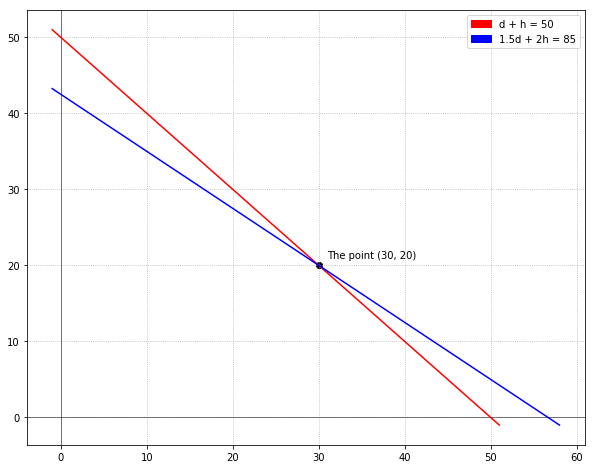

In [33]:
plt.figure(figsize=(10, 8))
axhline(y=0, color='k', linewidth=0.5)
axvline(x=0, color='k', linewidth=0.5)
plt.grid(linestyle='dotted')

# Equations of the line
def e1(x): return -x + 50
def e2(x): return (-1.5 * x + 85) / 2

# Plot lines, but extend a little to the left and right
plot([-1, 51], [e1(-1), e1(51)], color='red')
plot([-1, 58], [e2(-1), e2(58)], color='blue')

# Plot intersection
scatter(30, 20, marker='o', color='black')
annotate('The point (30, 20)', xy=(30, 20), xytext=(31, 21), ha='left')

# Create legends
v1 = leg(color='red', label='d + h = 50')
v2 = leg(color='blue', label='1.5d + 2h = 85')
plt.legend(handles=[v1, v2])

show()

Eureka! They cross at the point $x = d = 30$, $y = h = 20$. What this tells us is that of the 50 total hotdogs and hamburgers, Harry sold 30 hotdogs and 20 hamburgers. Although it may be obvious, we can plug these numbers back into our original equations to double check:

$$
d + h = 50 \\ (30) + (20) = 50 \enspace \checkmark
\\[15pt]
1.5d + 2h = 85 \\ 1.5(30) + 2(20) = 85 \enspace \checkmark
$$

Given that we successfully found the number of hotdogs and hamburgers Harry sold, he can happily replenish his stocks knowing how many of each he should buy.

Solving the system geometrically is an intuitive way to see the solution, but unfortunately, doesn't get us very far. First, we aren't able to reason about linear equations geometrically that contain more than 3 variables (i.e., we can't plot an equation that has 5 variables is 5D). Second, we can't write code to solve the equations. Fortunately, there are 2 other methods that are much more systematic.

### Solving using substitution

Another way to solve for $d$ and $h$ is to arrange one of the equations with respect to one of the variables and substitute that into the other equation. Given Harry's system:

$$
d + h = 50 \\[3pt]
1.5d + 2h = 85
$$

The easiest route is to rearrange the first equation with respect to $d$ by moving $h$ to the other side:

$$d = 50 - h$$

Now, substitute this into the other equation for the variable $d$ and solve for $h$:

$$
1.5d + 2h = 85 \\[3pt]
1.5(50 - h) + 2h = 85 \\[3pt]
75 - 1.5h + 2h = 85 \\[3pt]
0.5h = 10 \\[3pt]
h = 20
$$

Now that we know the value of $h$, we can find the value of $d$ by substituting back into $d = 50 - h$:

$$d = 50 - (20) \\[3pt] d = 30$$

That leaves us with $d = 30$, $h = 20$ which is consistent with our geometric solution. Phew.


### Solving using elimination

Finally, a third way we can solve the system of equations is by using elimination. To solve using elimination, we need to get rid of (i.e., _eliminate_) one of the variables and then solve for the remaining variable. With Harry's system again:

$$
d + h = 50 \\[3pt]
1.5d + 2h = 85
$$

Although these 2 equations help describe the same problem, they are completely independent equations. As such, we're able to combine them in various ways without changing the true value of $d$ and $h$. We are able to perform the following operations to the equations:

  1. Multiply an equation by a scalar number
  2. Add the equations (or any multiple of the equations)
  3. Subtract the equations (or any multiple of the equations)

We have to be careful to ensure that whatever we do, we do it to both sides of the equation. What can we do to these equations to get them into a state such that we can eliminate one of the variables? It would be pretty easy to get rid of $1.5d$ in the second equation by subtracting a multiple of the first equation from the second. Let's see it in action.

Multiply the first equation by $1.5$ leaving the second equation untouched:

$$
(1.5)d + (1.5)h = (1.5)50 \\[3pt]
1.5d + 2h = 85
$$

Carrying the multiplication through, this leaves us with:

$$
1.5d + 1.5h = 75 \\[3pt]
1.5d + 2h = 85
$$

Now, we can subtract the second equation from the first:

$$
1.5d + 1.5h = 75 \\[3pt]
- (1.5d + 2h = 85)
$$

The $d$ term goes to zero and what we're left with is:

$$-0.5h = -10$$

Solving for $h$, we get $h = 20$. So far, we can see this is consistent with our geometric and substitution solution. To find the value for $d$, plug $h = 20$ back into one of the original equations and solve for $d$. For instance, we will plug $h$ back into the first equation:

$$
d + h = 50 \\[3pt]
d + (20) = 50
$$

Solving for $d$, we get $d = 30$ which leaves us with:

$$d = 30, h = 20$$

Which is consistent with above solutions.

## Connection to vectors and matrices

I strategically put this guide after the guide on [matrices](matrices), because there is a connection between matrices and systems of linear equations. The connection is that you can represent the system of linear equations as a matrix! With the system above:

$$
d + h = 50 \\[3pt]
1.5d + 2h = 85
$$

We can represent this system using matrices with a row per equation. First, let's create a matrix for the coefficients. There are 2 equations total and 2 variables per equation, so we have a $2 x 2$ matrix to hold the coefficients of the variables:

$$\begin{bmatrix}1 & 1 \\ 1.5 & 2\end{bmatrix}$$

The row of $1$'s represent the coefficients for $d$ and $h$ in the first equation. Same for the second row and the second equation.

Next, we'll represent the variables with a $2 x 1$ vector with 2 elements:

$$\begin{bmatrix}d \\ h\end{bmatrix}$$

Finally, we also represent the totals with another $2 x 1$ vector with 2 elements:

$$\begin{bmatrix}50 \\ 85\end{bmatrix}$$

Now, we just need to put all the pieces together:

$$
\begin{bmatrix}1 & 1 \\ 1.5 & 2\end{bmatrix}
\begin{bmatrix}d \\ h\end{bmatrix}
=
\begin{bmatrix}50 \\ 85\end{bmatrix}
$$

What we've done is represent the system of linear equations as a product of 2 matrices. If you were to carry through the multiplication, you'd see that we arrive back at the same system:

$$
\begin{bmatrix}1d & 1h \\ 1.5d & 2h\end{bmatrix}
=
\begin{bmatrix}50 \\ 85\end{bmatrix}
$$

In general, a system of linear equations can be represented as the product of a coefficient matrix and a vector of unknown variables:

$$A\vec{x} = \vec{b}$$

Where $A$ is the matrix of coefficients, $\vec{x}$ is the vector of unknown variables, and $\vec{b}$ is the vector of constants to the right of the equals sign. In future guides, we'll investigate matrix techniques for finding the values in $\vec{x}$ such that it satisfies the equation.

$$
\begin{bmatrix}1 & 1 \\ 1.5 & 2\end{bmatrix}
\begin{bmatrix}d \\ h\end{bmatrix}
=
\begin{bmatrix}50 \\ 85\end{bmatrix}
\\
\enspace A\quad\enspace\enspace\vec{x} \enspace=\enspace\enspace\vec{b}
$$

Although we can successfully solve systems of linear equations using one of the techniques above, it quickly becomes difficult to solve systems consisting of more than 2 variables and more than 2 equations. The benefit of representing systems of linear equations this way is that it allows us to do all kinds of interesting matrix operations on the system to easily find the unknown values. In the next section, we'll see how to solve for $\vec{x}$ using matrix operations.

## Solvability

We saw above that the solution to a system of linear equations is the point at which the linear equations intersect. However, in practice sometimes the equations may not cross or may cross many times. In later guides, we'll dig into these corner cases and talk about what this means for our potential solutions and how to handle them.

## Summary, tl;dr

We saw a concrete example of how solving a system of linear equations is useful by helping our friend Harry answer a question about how many hotdogs and hamburgers he should buy to restock. While our problem may have seemed trivial, many problems in all kinds of domains can be structured as a system of linear equations. Like most things in math, there are multiple ways to solve a single problem and solving systems of linear equations is no exception. We saw that, for small enough examples, the problem can be solved geometrically by plotting the equations and seeing where they cross. Alternatively, we can solve the equations by substitution by taking one of the equations, solving for one of the variables, and substituting it back into the other equation and solving. Finally, the we can solve by elimination by combining the equations in ways to systematically eliminate the variables until we're left with only one. We can then solve for the others by plugging in the known values.

### Linear equations

Linear equations are equations that represent lines and are of the form:

$$a_1x_1 + a_2x_2 + \dots + a_nx_n + b = 0$$

Rearranging a linear equation consisting of 2 variables, $x$ and $y$ produces a equation in the familiar slope-intercept form, $y = mx + b$, where $m$ is the slope and $b$ is the Y-intercept.

### Systems of linear equations

A collection of linear equations are called a system of linear equations. Each equation specifies the problem in a different way using the same variables.

### Solving systems of linear equations

- Systems can be solved geometrically by plotting the equations and seeing at what point they cross
- Systems can be solved using substitution by taking one of the equations, solving for a variable, substitute back into the other equation, and solve
- Systems can be solved using elimination by combining the equations in order to eliminate the variables one-by-one until you're left with one and then plugging back in the known value
- During elimination, equations can be multiplied by a scalar, added, or subtracted

### Systems of linear equations as matrices

Systems of linear equations can be represented as a multiplication of matrices by putting the coefficients in a matrix, $A$, and the variables and constants into vectors, $\vec{x}$ and $\vec{b}$ respectively: $A\vec{x} = \vec{b}$

## What's next?

This guide introduced the idea behind systems of linear equations and showed various ways to arrive at a solution. However, no code was given for how we might systematically solve a system. As systems grow in the number of variables and equations, it becomes increasingly important to solve the systems in a systematic way. In the [next section](solving-systems-of-linear-equations), we'll determine how we can use matrices to represent and solve Harry's system of linear equations, and see how we can write some code to automatically solve systems of linear equations.

<nav class="links">
    <a href="matrices" class="prev">Matrices</a>
    <a href="solving-systems-of-linear-equations" class="next">Solving Systems of Linear Equations</a>
</nav>